# C3M3: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Implement kernel smoothing in R and interpret the results.

2. Implement smoothing splines as an alternative to kernel estimation.

3. Implement and interpret the loess smoother in R.

4. Compare and contrast nonparametric smoothing methods.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [209]:
# Load Required Packages
library(ggplot2)
library(mgcv)

# Problem 1: Advertising data

The following dataset containts measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`: the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook`: the advertising budget allocated to Facebook. Measured in thousands of dollars; and 

- `newspaper`: the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`: the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

First, we load the data, plot it, and split it into a training set (`train_marketing`) and a test set (`test_marketing`).

    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

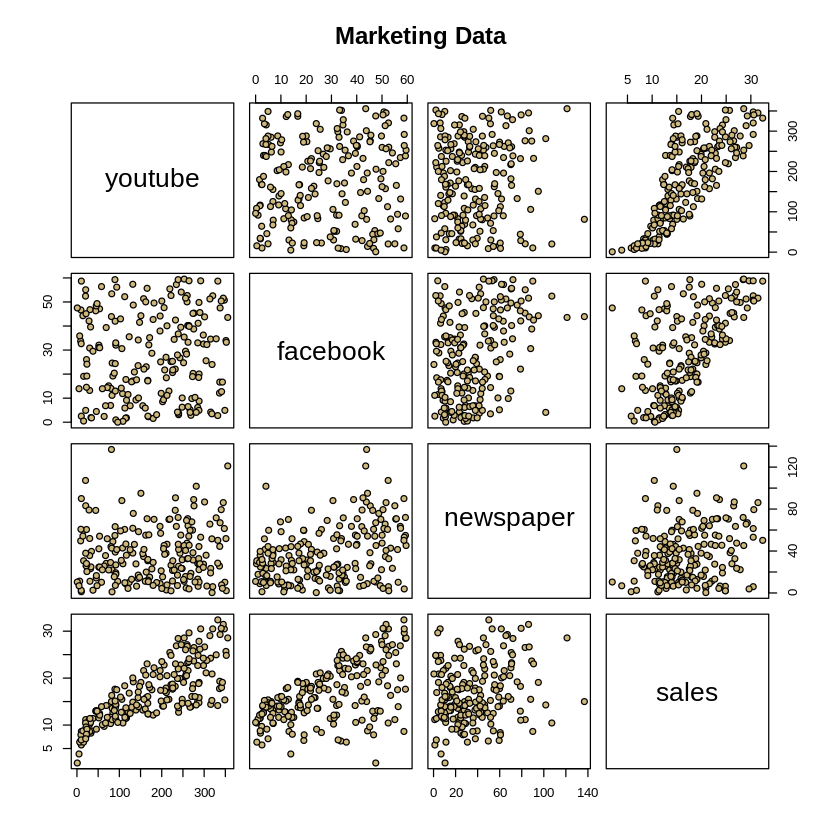

In [210]:
# Load in the data
marketing = read.csv("marketing.txt", sep="")
summary(marketing)
pairs(marketing, main = "Marketing Data", pch = 21, 
      bg = c("#CFB87C"))

In [211]:
set.seed(1771) #set the random number generator seed.
n = floor(0.8 * nrow(marketing)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(marketing)), size = n) #randomly sample indicies to be included in the training set

train_marketing = marketing[index, ] #set the training set to be the randomly sampled rows of the dataframe
test_marketing = marketing[-index, ] #set the testing set to be the remaining rows
dim(test_marketing) #check the dimensions
dim(train_marketing) #check the dimensions

[1] 40  4

[1] 160   4

**1.(a) Working with nonlinearity: Kernel regression**

Note that the relationship between `sales` and `youtube` is nonlinear. This was a problem for us back in the first course in this specialization, when we modeled the data as if it were linear. For now, let's just focus on the relationship between `sales` and `youtube`, omitting the other variables (future lessons on generalized additive models will allow us to bring back other predictors).

Using the `train_marketing` set, plot `sales` (response) against `youtube` (predictor), and then fit and overlay a kernel regression. Experiment with the bandwidth parameter until the smooth looks appropriate, or comment why no bandwidth is ideal. Justify your answer.

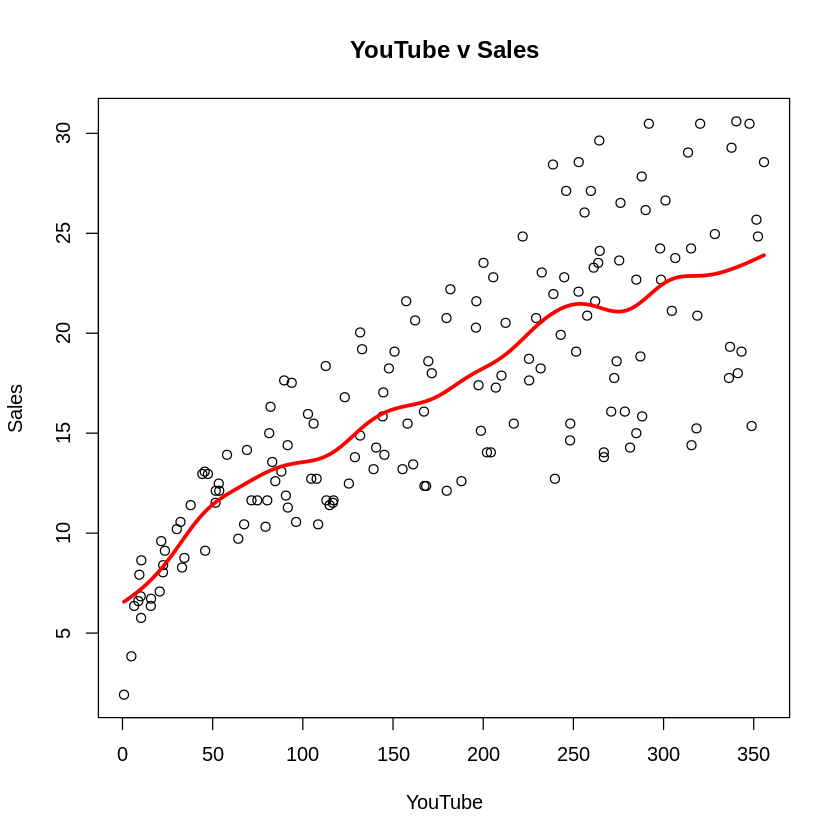

In [212]:
kern = ksmooth(train_marketing$youtube,train_marketing$sales,"normal",40)
plot(train_marketing$youtube,train_marketing$sales, main="YouTube v Sales", xlab="YouTube",ylab="Sales")
lines(kern,lwd=3,col="red")

<span style="color:orange">After experimenting with different values for the bandwidth of the kernal regression, I finally settled on a bandwidth of 40. Below 40, the regression was too spiky and seemed to be too sensitive to outliers. much greater than 40 then the model loses most of the nuance in the data and the residuals become visibly higher and the intercept become out of range of the data. No value was perfect or ideal because this bandwidth is relatively subjective, but without more rigorous tools or strategies, a bandwidth of 40 seems to fit the nonlinearity of the data the best.</span>.

**1.(b) Working with nonlinearity: Smoothing spline regression**

Again, using the `train_marketing` set, plot `sales` (response) against `youtube` (predictor). This time, fit and overlay a smoothing spline regression model. Experiment with the smoothing parameter until the smooth looks appropriate. Explain why it's appropriate and justify your answer.

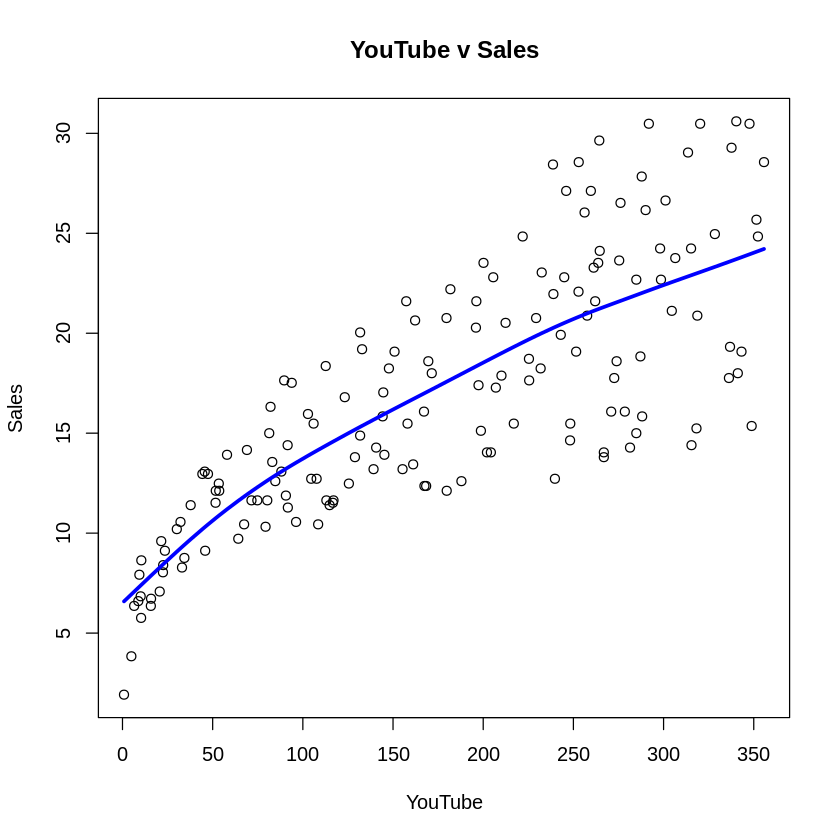

In [213]:
smoo = smooth.spline(train_marketing$youtube,train_marketing$sales,spar=1)
plot(train_marketing$youtube,train_marketing$sales, main="YouTube v Sales", xlab="YouTube",ylab="Sales")
lines(smoo,lwd=3,col="blue")

<span style="color:orange">After experimenting with different values for the smoothing parameter of the smoothing spline, I finally settled on a spar of 1. Below 1, the spline was too spiky while values too close to 1 were visibly not a good fit. No value was perfect or ideal, but the spar=1 was visibly a good fit. It seemed to run through the average data instead of following each point or not fitting the values at all.

**1.(c) Working with nonlinearity: Loess**

Again, using the `train_marketing` set, plot `sales` (response) against `youtube` (predictor). This time, fit and overlay a loess regression model. You can use the `loess()` function in a similar way as the `lm()` function. Experiment with the smoothing parameter (`span` in the `geom_smooth()` function) until the smooth looks appropriate. Explain why it's appropriate and justify your answer.

`geom_smooth()` using formula 'y ~ x'



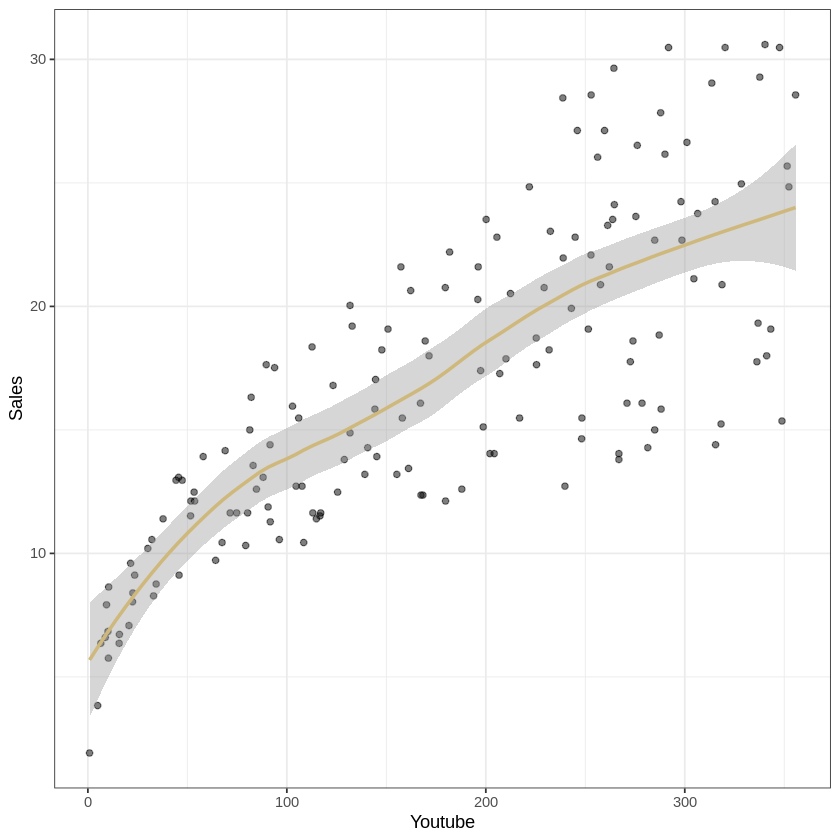

In [214]:
loes = loess(sales ~ youtube, data = train_marketing, span=0.6)
loep = predict(loes, test_marketing)

ggplot(train_marketing, aes(youtube, sales)) +
geom_point(color = "black", alpha = 0.5) +
geom_smooth(method = "loess", color = "#CFB87C",span=0.6) +
theme_bw() +
xlab("Youtube") +
ylab("Sales")

<span style="color:orange"> After experimenting with different values for the span of the loess model, I finally settled on a span of 0.6. Below 0.6, the spline was too spiky while values that were much bigger did not seem to offer better fit. There was a threshold of goodness that had been reached at 0.6 and not improved at larger values.

**1.(d) A prediction metric**

Compare the models using the mean squared prediction error (MSPE) on the `test_marketing` dataset. That is, calculate the MSPE for your kernel regression, smoothing spline regression, and loess model, and identify which model is best in terms of this metric.

Remember, the MSPE is given by 

\begin{align*}
MSPE = \frac{1}{k}\sum^k_{i=1}\left(y^\star_i - \widehat{y}^\star_i \right)^2 
\end{align*}

where $y^\star_i$ are the observed response values in the test set and $\widehat{y}^\star_i$ are the predicted values for the test set (using the model fit on the training set).

\*Note that `ksmooth()` orders your designated `x.points`. Make sure to account for this in your MSPE calculation.

In [215]:
MSPEksmooth = mean((test_marketing$sales-kern$y)^2)
MSPEksmooth

MSPEsmooth.spline = mean((test_marketing$sales-smoo$y)^2)
MSPEsmooth.spline

MSPEloess = mean((test_marketing$sales-loep)^2)
MSPEloess


[1] 61.0982

Warning message in test_marketing$sales - smoo$y:
“longer object length is not a multiple of shorter object length”


[1] 62.80301

[1] 18.17819

<span style="color:orange"> 
In terms of the MSPE, the Loess regression model is the best. The MSPE is near 18 while the others are above 60.
</span>

# Problem 2: Simulations!

Simulate data (one predictor and one response) with your own nonlinear relationship. Provide an explanation of how you generated the data. Then answer the questions above (1.(a) - 1.(d)) using your simulated data.

To generate 1 predictor and 1 response, I generated a sequence of 200 points form -100 to 100 and passed them into a non-linear (quadratic) function to obtain a non-linear relationship between the predictor and response. Noise was added to the result. Once the data was generated, it was randomly sorted into a training set and testing set.

[1] 160   2

[1] 41  2

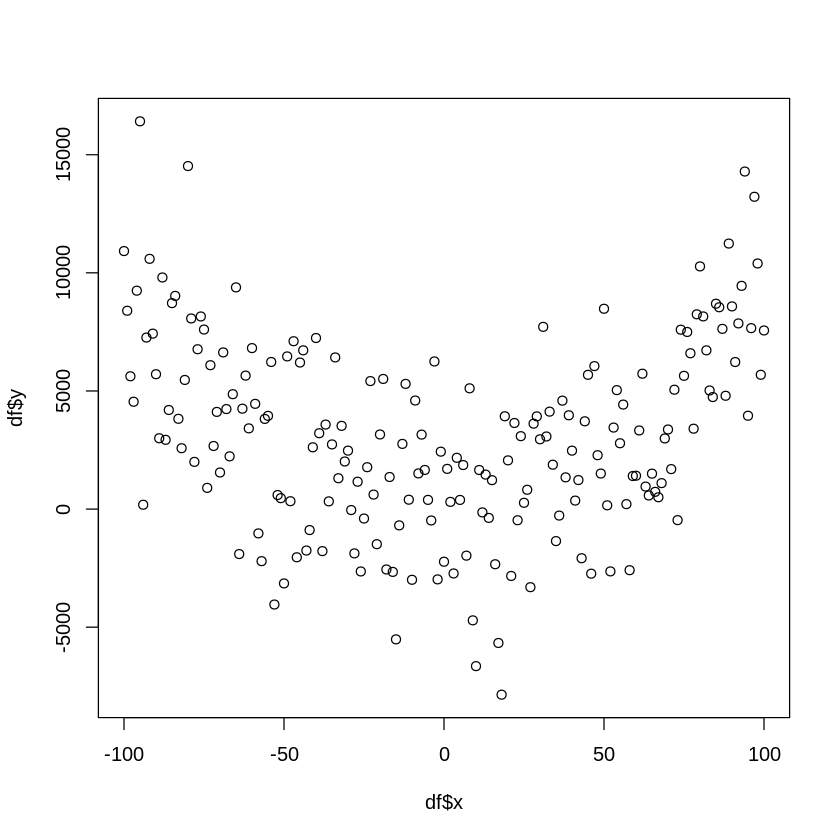

In [285]:
#simulated data
x = seq(-100, 100) 
y = x^2 + rnorm(length(x), 0, 3000)      # generate non-linear association with noise
df = data.frame(x,y)
plot(df$x, df$y)






set.seed(3434) #set the random number generator seed.
n = floor(0.8 * nrow(df)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(df)), size = n) #randomly sample indicies to be included in the training set

train = df[index, ] #set the training set to be the randomly sampled rows of the dataframe
test = df[-index, ] #set the testing set to be the remaining rows
dim(train) #check the dimensions
dim(test) #check the dimensions

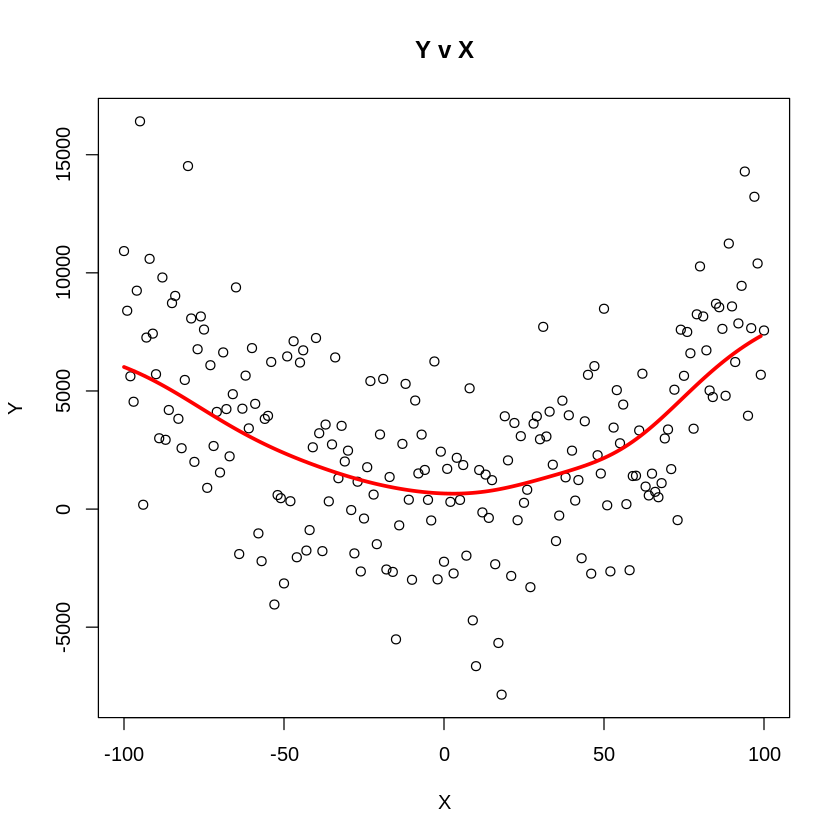

In [286]:
#1.a
kern = ksmooth(train$x,train$y,"normal",50)
plot(df$x,df$y, main="Y v X", xlab="X",ylab="Y")
lines(kern,lwd=3,col="red")


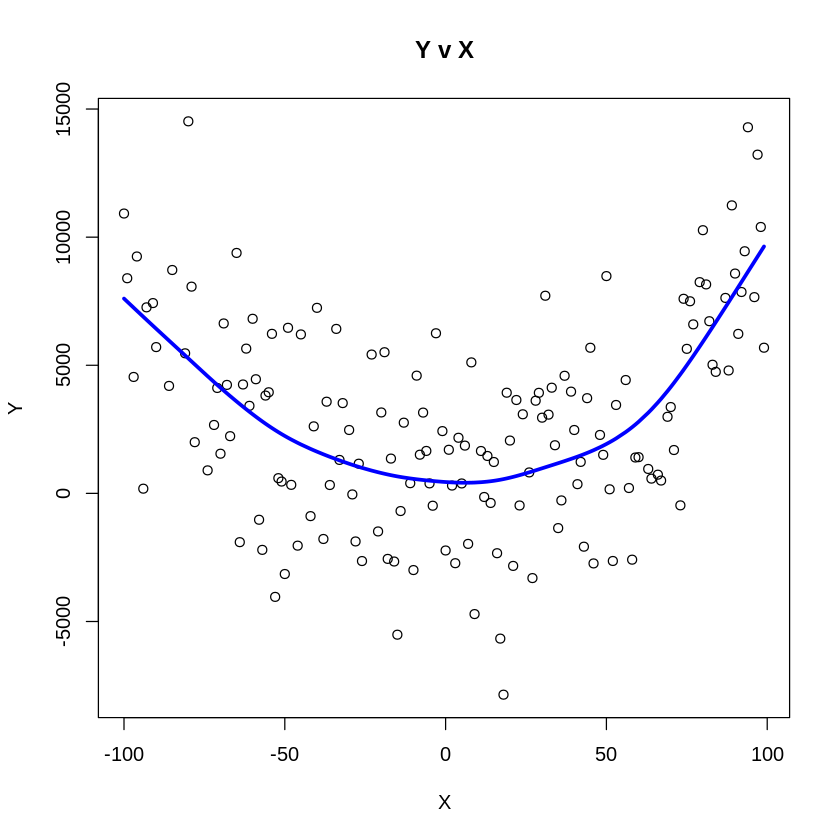

In [287]:
#1.b
smoo = smooth.spline(train$x,train$y,spar=0.9)
plot(train$x,train$y, main="Y v X", xlab="X",ylab="Y")
lines(smoo,lwd=3,col="blue")


`geom_smooth()` using formula 'y ~ x'



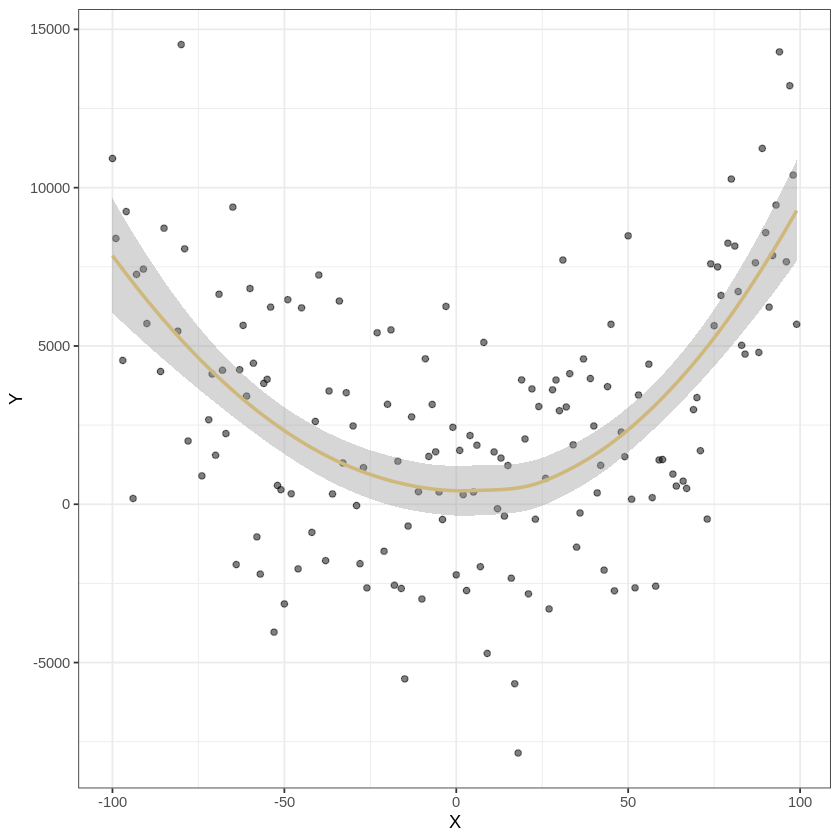

In [288]:
#1.c
loes = loess(y ~ x, data = train, span=1)
loep = predict(loes, test)

ggplot(train, aes(x, y)) +
geom_point(color = "black", alpha = 0.5) +
geom_smooth(method = "loess", color = "#CFB87C", span=1) +
theme_bw() +
xlab("X") +
ylab("Y")

In [289]:
#1.d
MSPEksmooth = mean((test$y-kern$y)^2)
MSPEksmooth

MSPEsmooth.spline = mean((test$y-smoo$y)^2)
MSPEsmooth.spline

MSPEloess = mean((test$y-loep[!is.na(loep)])^2)
MSPEloess


Warning message in test$y - kern$y:
“longer object length is not a multiple of shorter object length”


[1] 22861710

Warning message in test$y - smoo$y:
“longer object length is not a multiple of shorter object length”


[1] 25511376

Warning message in test$y - loep[!is.na(loep)]:
“longer object length is not a multiple of shorter object length”


[1] 10177422

<span style="color:orange">
For the bandwidth of the kernal regression, I finally settled on a bandwidth of 50. Below 50, the regression was too spiky and seemed to be too sensitive to outliers. No value was perfect or ideal because this bandwidth is subjective, but without more rigorous tools or strategies, a bandwidth of 50 seems to fit the nonlinearity of the data the best.<br>

<span style="color:orange">
    After experimenting with different values for the smoothing parameter of the smoothing spline, I finally settled on a spar of 0.9. No value was perfect or ideal, but the spar=0.9 was visibly a good fit, as much as it could be with the generated data.<br>

<span style="color:orange">
    The loess model uses span of 1. Below 1, the spline was too spiky while values that were much bigger did not seem to offer better fit. There was a threshold of goodness that had been reached at 1 and not improved at larger values.

<span style="color:orange">
        After comparing the MSPE for all the models, once again, I found that the Loess model performed the best of the three.
</span>
